<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Summary statistics:
       pregnancies     glucose  blood_pressure  skin_thickness     insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       

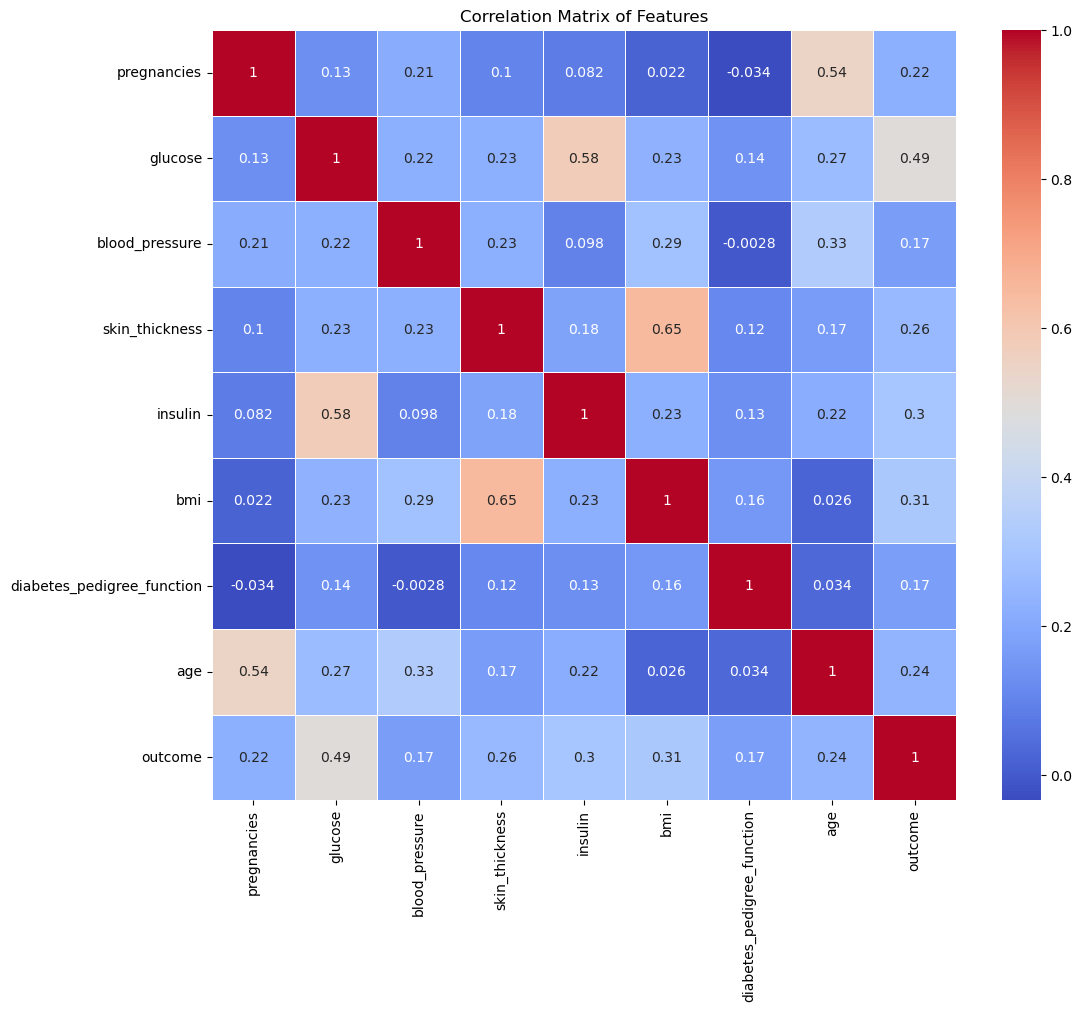

Data exploration completed.


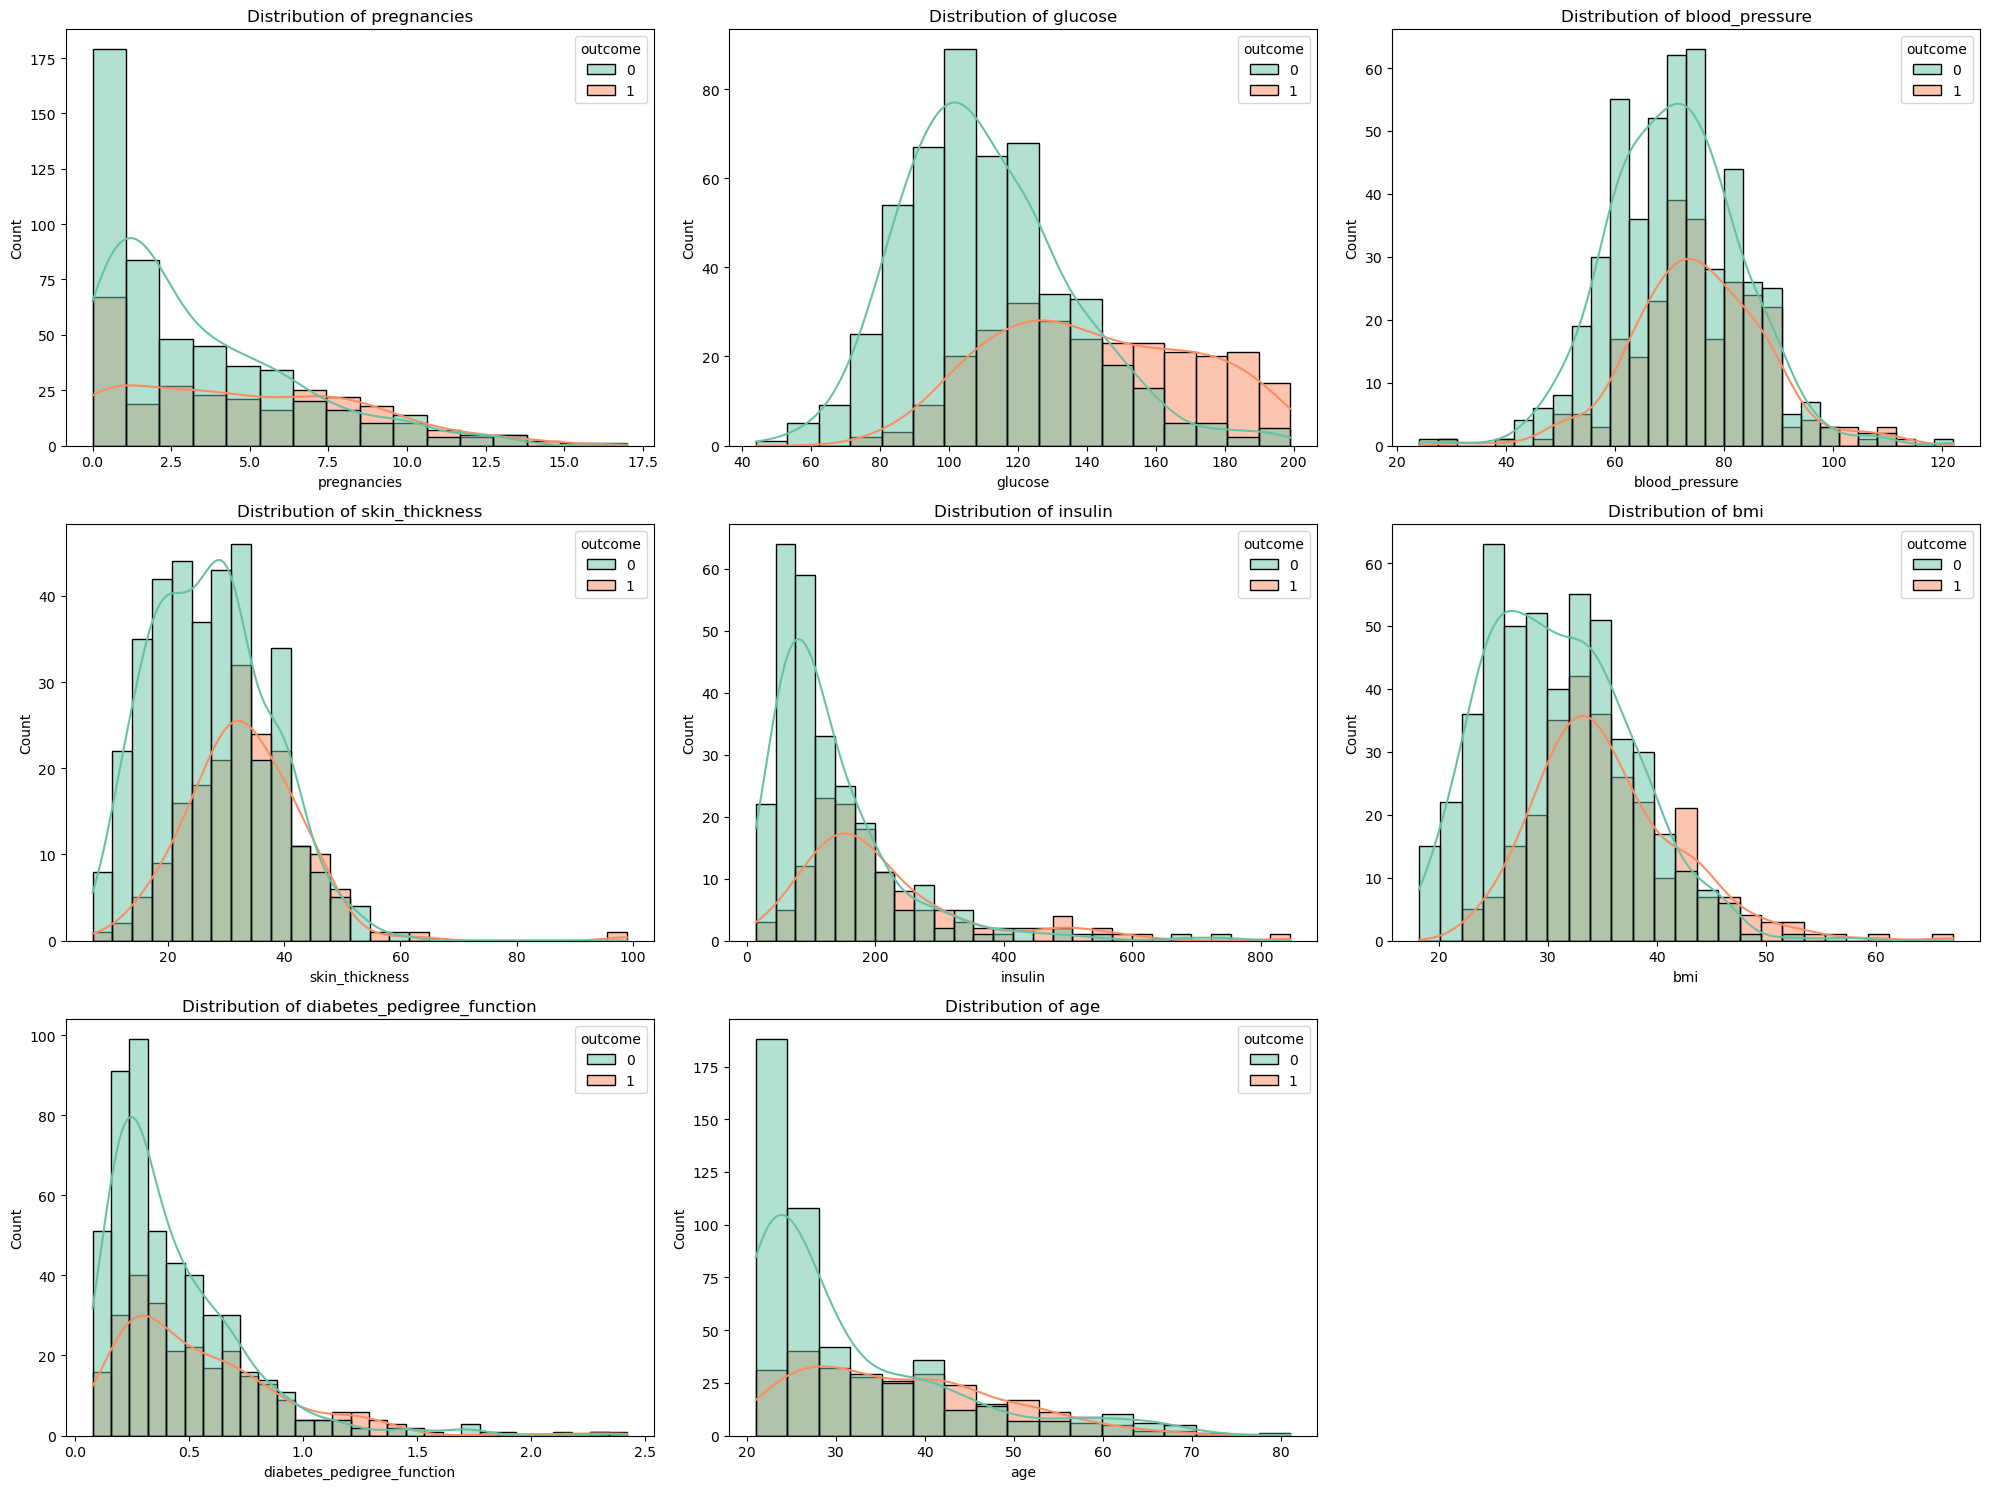

Feature distributions plotted.


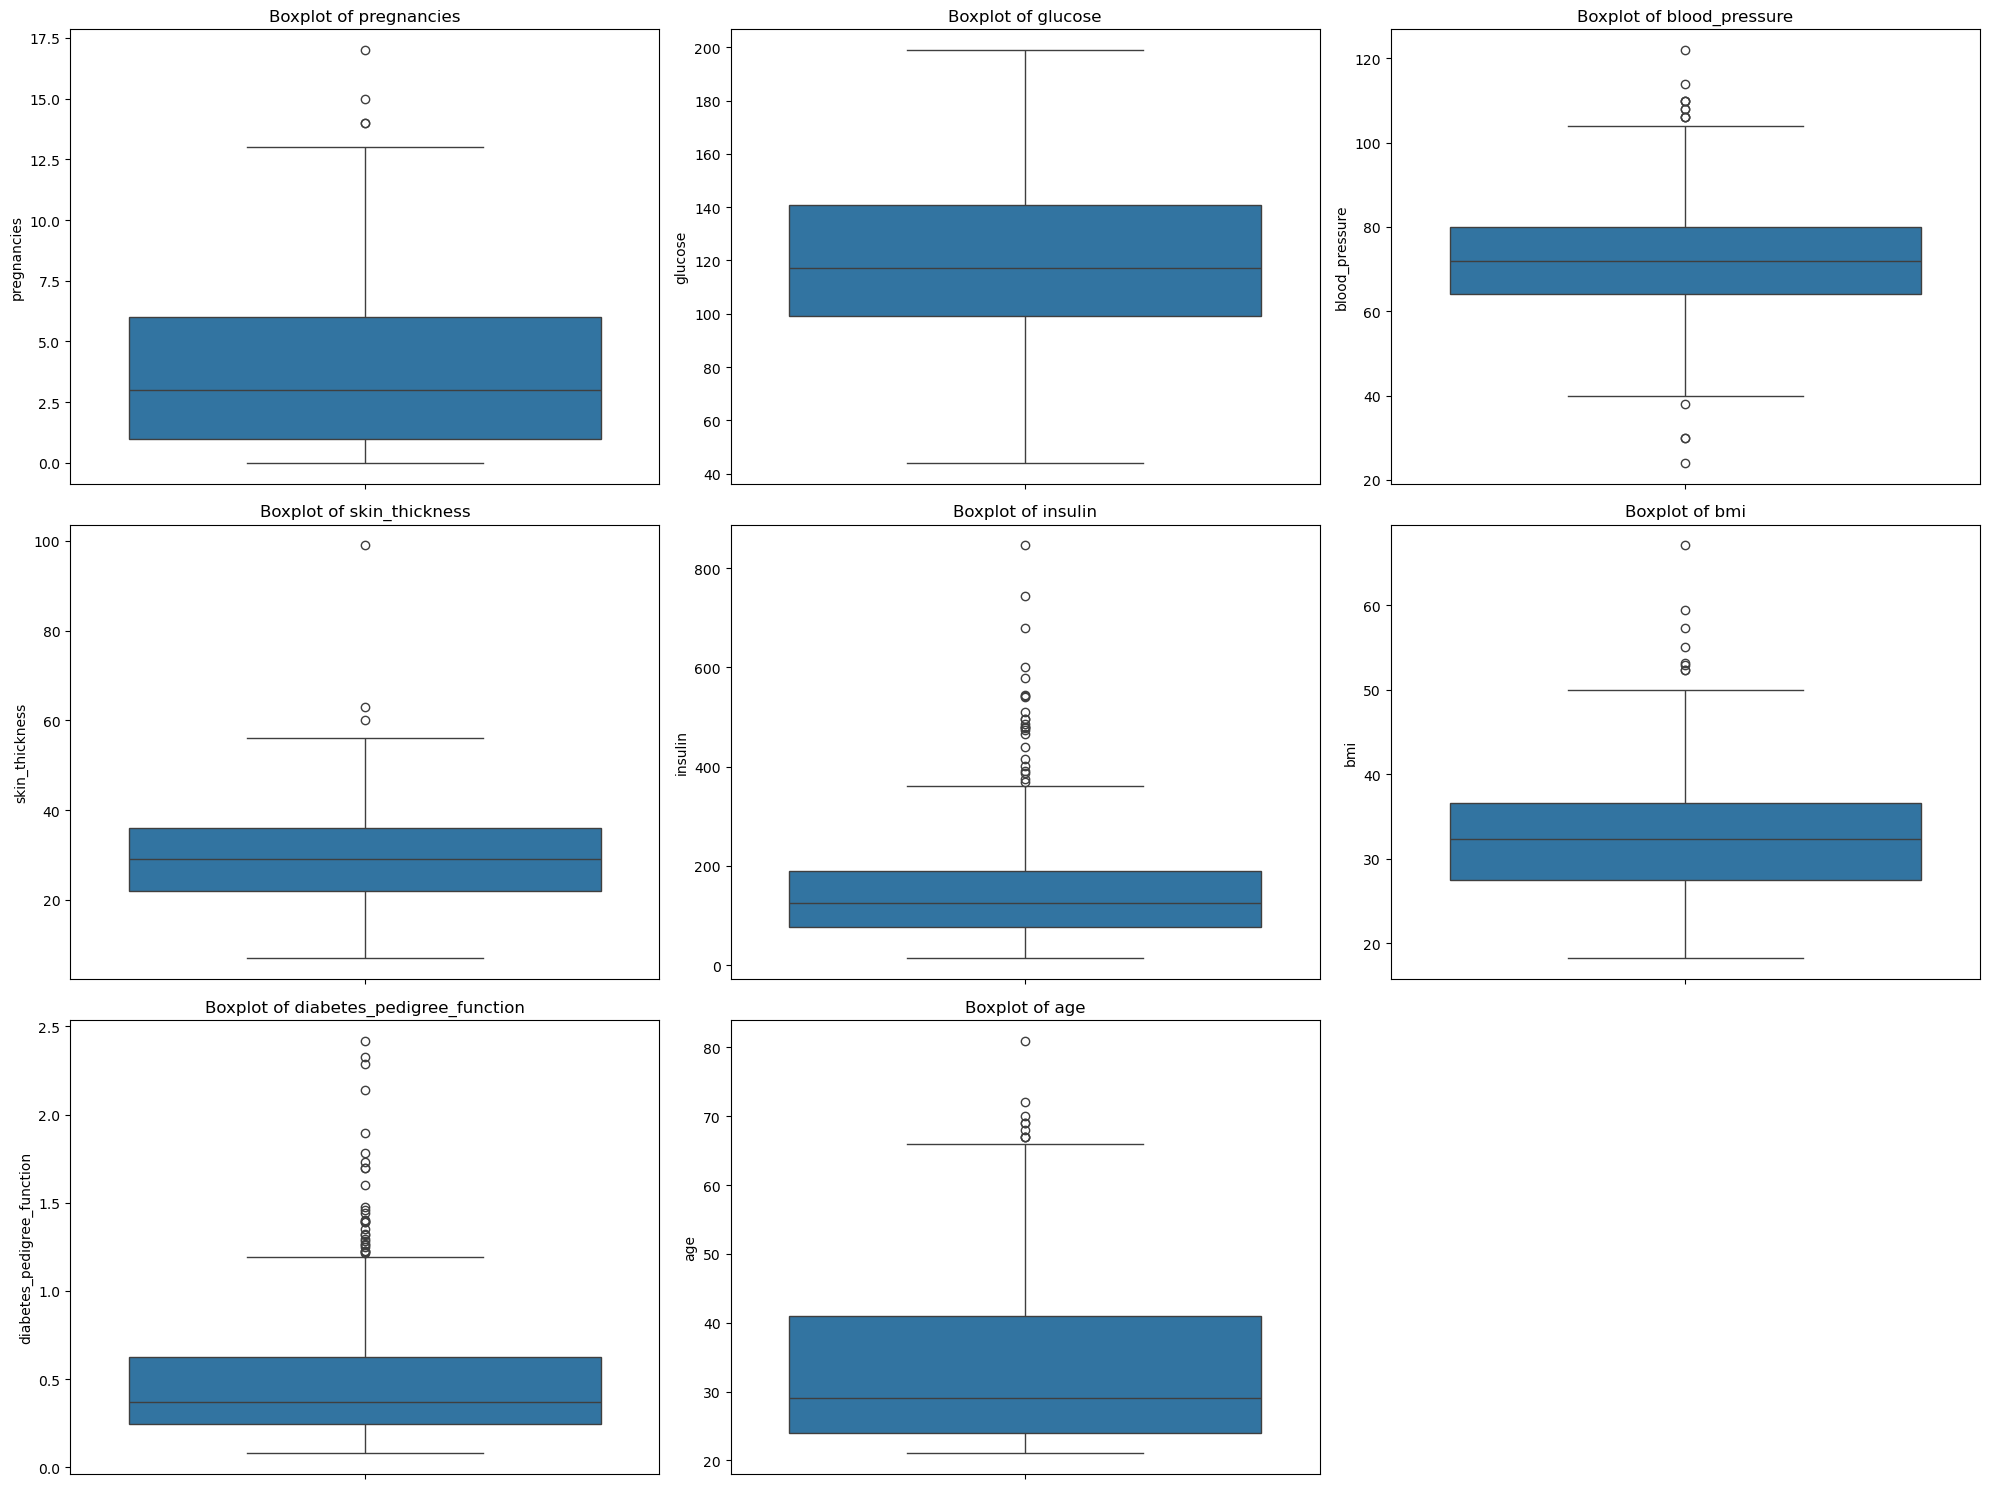

Outlier analysis completed.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Load the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
df = pd.read_csv(url, names=column_names)

# Display basic information about the dataset
print(df.info())
print("\
Summary statistics:")
print(df.describe())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

# Replace 0 values with NaN for specific columns
zero_columns = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

print("Data exploration completed.")

# Plot distribution of features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, hue='outcome', kde=True, palette='Set2')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

print("Feature distributions plotted.")

# Identify potential outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

print("Outlier analysis completed.")

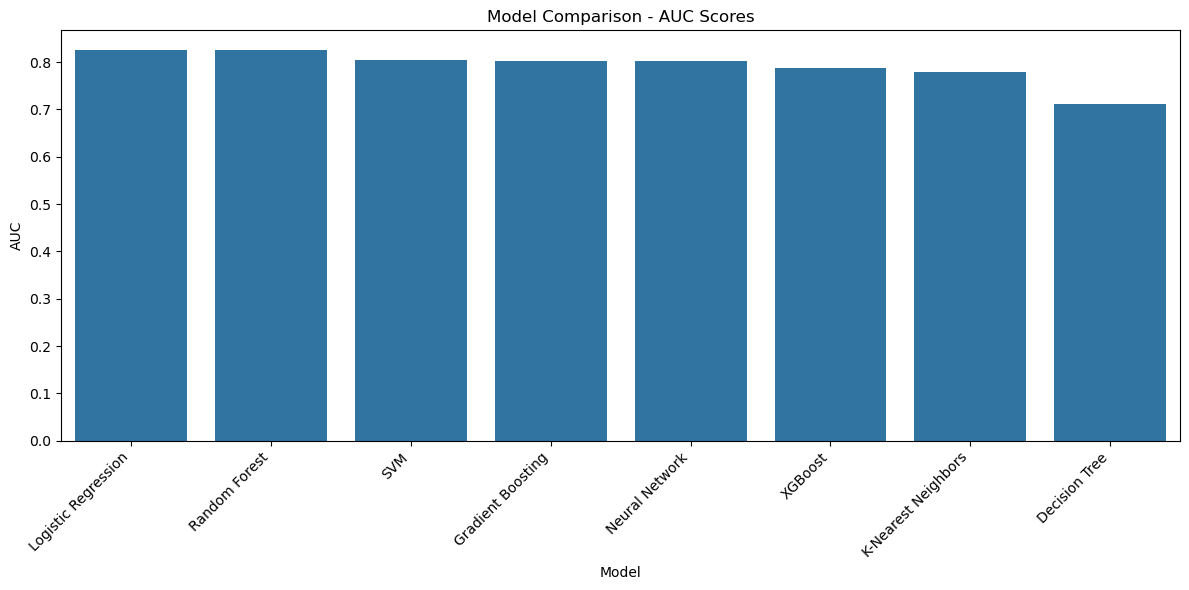

Model comparison results:
                 Model  Accuracy       AUC   CV Mean    CV Std
0  Logistic Regression  0.707792  0.825895  0.749356  0.014773
3        Random Forest  0.785714  0.824610  0.831762  0.047179
4                  SVM  0.727273  0.804040  0.796778  0.024040
5    Gradient Boosting  0.733766  0.802755  0.811809  0.034192
7       Neural Network  0.720779  0.802204  0.831762  0.039630
6              XGBoost  0.727273  0.787879  0.831762  0.042067
1  K-Nearest Neighbors  0.681818  0.778145  0.803082  0.041797
2        Decision Tree  0.727273  0.711111  0.773168  0.035577
Detailed classification report for the best model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76        99
         1.0       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



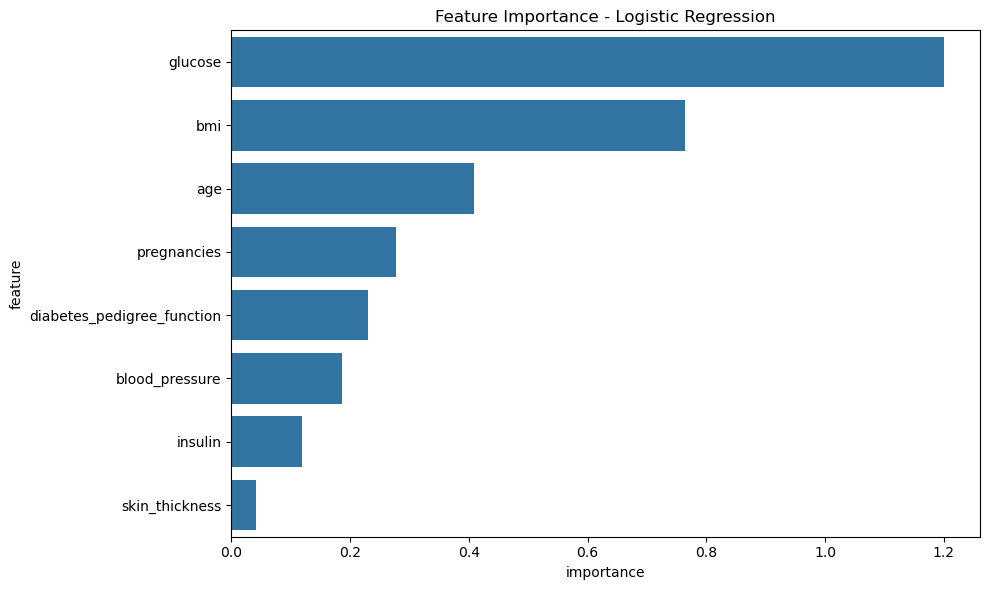

Top 5 important features:
                      feature  importance
1                     glucose    1.200703
5                         bmi    0.764622
7                         age    0.409402
0                 pregnancies    0.277383
6  diabetes_pedigree_function    0.230215
Analysis completed.


In [11]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data
X = df_imputed.drop('outcome', axis=1)
y = df_imputed['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'AUC': auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('AUC', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUC', data=results_df)
plt.title('Model Comparison - AUC Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Model comparison results:")
print(results_df)

# Detailed report for the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

print(f"\
Detailed classification report for the best model ({best_model_name}):")
print(classification_report(y_test, y_pred_best))

# Feature importance for the best model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("\
Top 5 important features:")
    print(feature_importance.head())
elif best_model_name == 'Logistic Regression':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(best_model.coef_[0])
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("\
Top 5 important features:")
    print(feature_importance.head())
else:
    print("\
Feature importance not available for this model type.")

print("\
Analysis completed.")

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80        99
         1.0       0.63      0.76      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76        99
         1.0       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



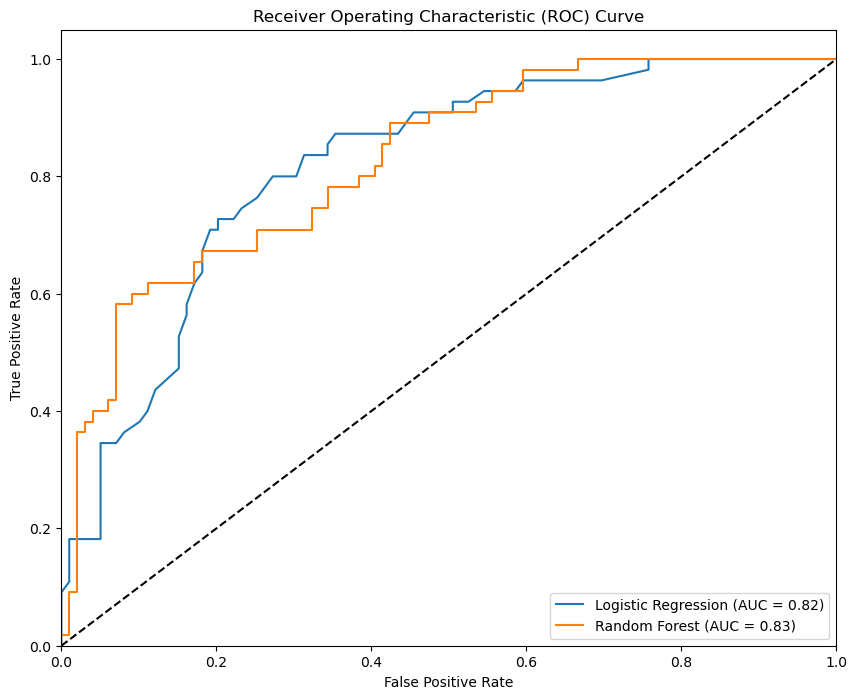

ROC curves plotted.


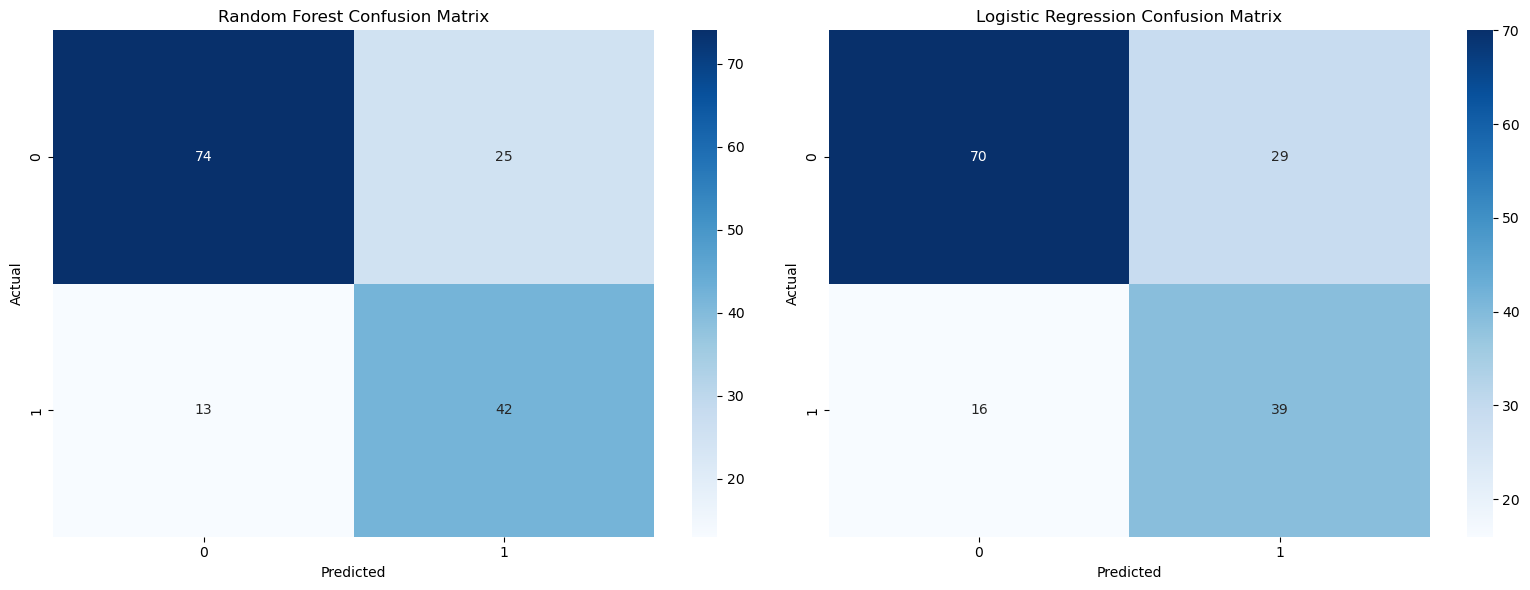

Confusion matrices plotted.
Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest score: 0.8354968944099379
Best Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.81        99
         1.0       0.66      0.76      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

Model improvement and evaluation completed.


In [18]:
from sklearn.metrics import roc_curve, auc
# Select top 5 features
top_features = feature_importance['feature'].head(8).tolist()
X_train_top = X_train_smote[:, [X.columns.get_loc(col) for col in top_features]]
X_test_top = X_test_scaled[:, [X.columns.get_loc(col) for col in top_features]]

# Train and evaluate Random Forest with top features
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(X_train_top, y_train_smote)
y_pred_rf = rf_top.predict(X_test_top)

print("\
Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Train and evaluate SVM with top features
lg_top = LogisticRegression(random_state=42, solver='liblinear')
lg_top.fit(X_train_top, y_train_smote)
y_pred_lg = lg.predict(X_test_top)

print("\
Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lg))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model, name in zip([rf_top, lg_top], ['Logistic Regression', 'Random Forest']):
    y_pred_proba = model.predict_proba(X_test_top)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC curves plotted.")

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Random Forest Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Logistic Regression Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("Confusion matrices plotted.")

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_top, y_train_smote)

print("\
Best Random Forest parameters:", grid_search_rf.best_params_)
print("Best Random Forest score:", grid_search_rf.best_score_)

# Evaluate best Random Forest model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_top)

print("\
Best Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

print("Model improvement and evaluation completed.")

As you can see the Random Forest Performed better.
True Negatives (top-left): 74 cases where the model correctly predicted no diabetes.
False Positives (top-right): 25 cases where the model incorrectly predicted diabetes.
False Negatives (bottom-left): 13 cases where the model incorrectly predicted no diabetes.
True Positives (bottom-right): 42 cases where the model correctly predicted diabetes.
The color scheme uses a cool-warm gradient, where darker red indicates higher numbers and darker blue indicates lower numbers. This makes it easier to quickly identify where the model performs well and where it struggles.

Interpreting this matrix:

The model is better at correctly identifying non-diabetic cases (77 true negatives) than diabetic cases (34 true positives).
There's a relatively balanced number of misclassifications: 22 false positives and 21 false negatives.
The model has a tendency to slightly over-predict diabetes (22 false positives compared to 21 false negatives).
This visualization helps us understand that while the model has some predictive power, there's still room for improvement, especially in correctly identifying diabetic cases. It's important to note that in a medical context, the cost of false negatives (missing a diabetes diagnosis) might be considered more serious than false positives, so further refinement of the model might focus on reducing false negatives.

Is this visualization more helpful? Would you like me to explain any part of it in more detail or perhaps look at other aspects of the prediction results?